## Anomaly Detection using Brutlag algorithm

### Dataset
The dataset contains India's monthly average temperature (°C) recorded for a period of 2000-2018.


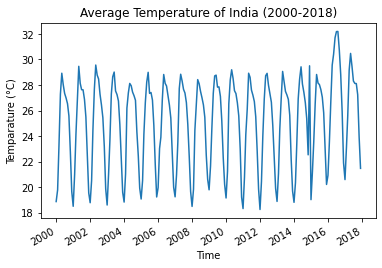

In [1]:
from time_series import TimeSeries

# Imports for data visualization
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ts = TimeSeries('dataset/average_temp_india.csv', train_size=0.7)

plt.plot(ts.data.iloc[:,1].index,ts.data.iloc[:,1])
plt.gcf().autofmt_xdate()
plt.title("Average Temperature of India (2000-2018)")
plt.xlabel("Time")
plt.ylabel("Temparature (°C)")
plt.show()

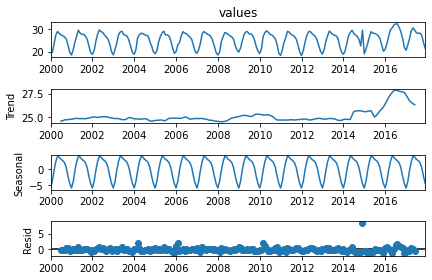

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(ts.data.iloc[:,1],model='additive',period=12).plot()
plt.show()

## Observations

1. The time series has an overall slight increasing trend and constant seasonality with period = 12.
2. From the initial observation we can see that data around 2015 has some amount of anomaly as the residue components indicates it.
3. Also data between 2016-2017 shows an abnormal increase compared to other data points. The trend component for the same peroid support the assumption.

## Anomaly Plot

This plot was generated by [anomaly_detection.py](https://github.com/KrishnanSG/holt-winters/blob/master/anomaly_detection.py).

![Plot](https://raw.githubusercontent.com/KrishnanSG/holt-winters/master/plots/brutlag_plot.png?token=AKOF7AY5U23BQM3UVB4JVHK6Q5Y3W)



### The data points classified as anomaly

|   date    |values|
|-----------|------|        
|2001-05-01 |29.46 |
|2001-09-01 |26.86 |
|2001-12-01 |19.55 |
|2002-04-01 |27.66 |
|2002-07-01 |28.47 |
|2002-11-01 |23.17 |
|2006-01-01 |19.96 |
|2006-02-01 |23.02 |
|2010-03-01 |26.53 |
|2014-12-01 |29.50 |
|2016-01-01 |20.92 |
|2016-02-01 |23.58 |
|2016-05-01 |30.41 |
|2016-06-01 |31.70 |
|2016-07-01 |32.18 |
|2016-08-01 |32.19 |
|2016-09-01 |30.72 |
|2016-10-01 |28.81 |
|2016-11-01 |25.90 |

## Analysing the anomaly obsevered between 2016-2017

![Plot](https://raw.githubusercontent.com/KrishnanSG/holt-winters/master/plots/anomaly_2016-17.png?token=AKOF7AYL6D7JHEG25KDXU6S6Q5YWY)



## Conclusion

The anomalies present in the time series have been correctly identified. Also the initial observations made on the time series using seasonal decompose turn out to be appropriate and can be verified by the confidence bands genereated by brutlag algorithm.